# Titanic Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. In this project I'll complete the analysis of what sorts of people were likely to survive. Using machine learning I'll build a Artificial Neural Network model which given a new data about a person will predict his/her likelyhood of survival during Titanic disaster.

### Import Libraries

In [864]:
import numpy as np
import pandas as pd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [865]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
combine = [train_data, test_data]

### Data Analysis and Preprocessing

##### Data Analysis

In [866]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [867]:
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [868]:
train_data.info()
print('_'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [869]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [870]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Johnson, Mr. William Cahoone Jr",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


###### Analise by pivoting features

In [871]:
# Compare Pclass with Survived Mean
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [872]:
# Compare Sex with Survived Mean
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [873]:
# Compare SibSp with Survived Mean
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [874]:
# Compare Parch with Survived Mean
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


##### Analyze by visualizing data

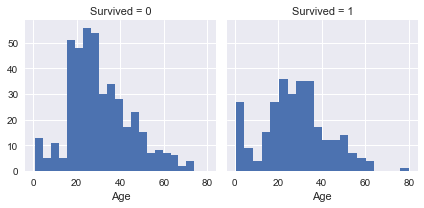

In [875]:
# Graphical representation of corrolation between age and survival.
graph = sns.FacetGrid(train_data, col='Survived')
graph.map(plt.hist, 'Age', bins=20)

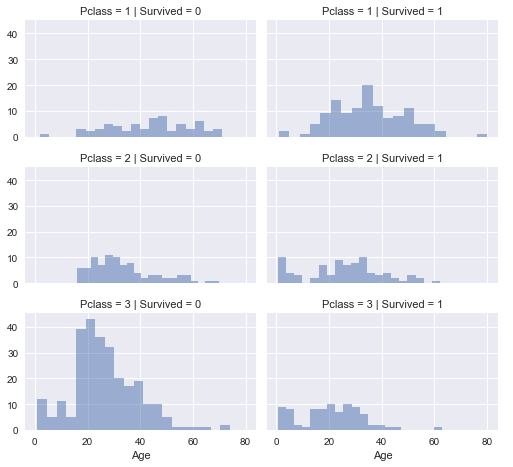

In [876]:
# Graphical comaprison between Pclass and survival
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

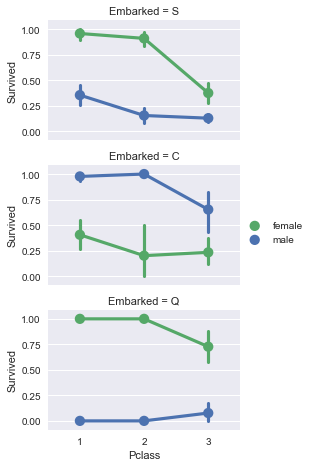

In [877]:
# Comparing Embarked with Pclass and survival rate
grid = sns.FacetGrid(train_data, row='Embarked', size=2.2, aspect=1.6)
# First x-axis, then y-axis, then elements
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

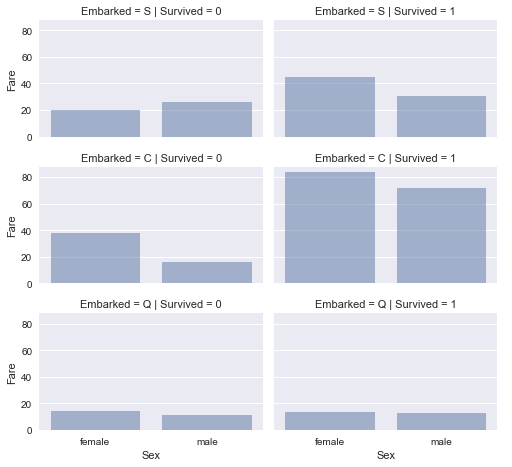

In [878]:
# Comparing 'Embarked' with 'Fare', given survival rate and sex
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

##### Data Preprocessing

In [879]:
# Load data again so I don't have to scroll up each time when I mess up with my data.
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
combine = [train_data, test_data]
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [880]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [881]:
# Delete unnecessary features
print("Before", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)

train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_data, test_data]

print("After", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [882]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [883]:
# Add new feature 'Title' to both train_data and test_data via combine list.
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [884]:
# Replace many titles with a more common name or classify them as 'Rare'
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col','Don', 'Dr',
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    # You can use .replace on lists
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
    

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [885]:
# Convert the categorical titles to ordinal
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    
    # Mapping replaces a name with a number that was listed in 'title_mapping' variable
    dataset['Title'] = dataset['Title'].map(title_mapping)
    
    # DataFrame.fillna files Na/NaN values with chosen number, in this case  0
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [886]:
# Now we can safely drop the 'Name' feature from training and testing datasets. We also don't need the PassengerId feature
# in the training dataset.
train_data = train_data.drop(['Name', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

# Update 'combine' list
combine = [train_data, test_data]

# Print
train_data.shape, test_data.shape

((891, 9), (418, 9))

In [887]:
# Now we can convert features which contain strings to numerical values. This is required by most model algorithms
# Doing so will also help us in achieving the feature completing goal.
# First of all let's convert 'Sex' feature where female=1 and male=0

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


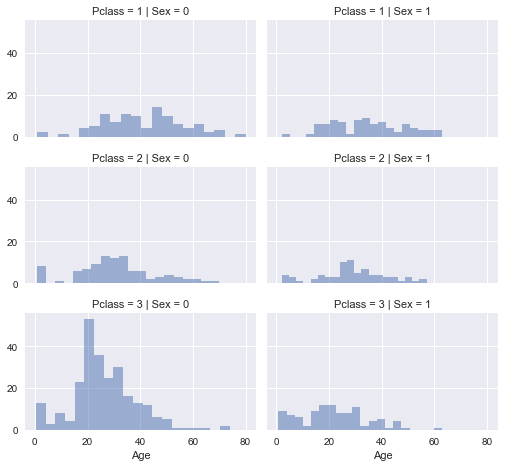

In [888]:
# Replace missing or null values in 'Age' feature.
# Use method 3 where be use random number between mean and standard deviation, based on sets of Pclass
# and Gender combinations

grid = sns.FacetGrid(train_data, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [889]:
# Empty array which contains guessed 'Age' values based on Pclass x Gender combinations.
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [890]:
# Iterate over 'Sex' (0 or 1) and 'Pclass' (1,2,3) to calculate guessed values of Age for the six combinations.

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_data = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            age_guess = guess_data.median()
            
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5) * 0.5
            
        for i in range(0, 2):
            for j in range(0, 3):
                dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), \
                           'Age'] = guess_ages[i,j]
                
        dataset['Age'] = dataset['Age'].astype(int)
        
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [891]:
# Create Age bands and determine correlations with Survived.
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.594771
1,"(16.0, 32.0]",0.310421
2,"(32.0, 48.0]",0.386473
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [892]:
# Replace Age with ordinals based on these bands.
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <=48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <=64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [893]:
# Remove 'AgeBand' feature and update 'combine' dataset
train_data = train_data.drop(['AgeBand'], axis=1)
combine = [train_data, test_data]
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [894]:
# Create new feature 'FamilySize' which combines 'Parch' and 'SibSp'
# This will enable us to drop 'Parch' and 'SibSp' from our datasets

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [895]:
# Create another feature called 'IsAlone'
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[(dataset['FamilySize'] == 1), 'IsAlone'] = 1
    
train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [896]:
# Drop Parch, SibSp, and FamilySize features in favor of IsAlone
train_data = train_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

# Update combine dataset
combine = [train_data, test_data]

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [897]:
# Create an artificial feature combining Pclass and Age
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
    
train_data.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)
    

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [898]:
# Find the most common occuring 'Embarked' value
freq_port = train_data.Embarked.dropna().mode()[0]
freq_port

'S'

In [899]:
# Fill empty 'Embarked' values with the most common occurance
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [900]:
# Converd 'Embarked' features to numeric
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [901]:
# Create new 'FareBand' feature
train_data['FareBand'] = pd.cut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(['FareBand'], ascending=False)

,FareBand,Survived
3,"(384.247, 512.329]",1.000000
2,"(256.165, 384.247]",0.666667
1,"(128.082, 256.165]",0.724138
0,"(-0.512, 128.082]",0.368113


In [902]:
# Find most frequent value in 'Fare'
freq_fare = train_data.Fare.dropna().mode()[0]

# Fill empty or nan values in 'Fare' with the most common one
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(freq_fare)

In [903]:
# Convert the 'Fare' feature to ordinal values based on the 'FareBand'
i = 0

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3

    dataset['Fare'] = dataset['Fare'].astype(int)

# Delete 'FareBand'
train_data = train_data.drop(['FareBand'], axis=1)

# Update combine
combine = [train_data, test_data]

train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [904]:
test_data.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


##### Prepare train/test data and labels

In [905]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test = test_data.drop("PassengerId", axis=1).copy()
Y_test = pd.read_csv("gender_submission.csv").drop("PassengerId", axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((891, 8), (891,), (418, 8), (418, 1))

### Build the Network

In [906]:
class NeuralNetwork(object):
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.lr = learning_rate
        
        # Initialize weights
        self.input_hidden_weights = np.random.randn(hidden_nodes, input_nodes) # 10x7
        self.hidden_output_weights = np.random.randn(output_nodes, hidden_nodes) # 1x10
        
        
        # Sigmoid activation funciton
        self.sigmoid = lambda x: 1/(1+np.exp(-x))
        
    def train(self, input_list, label_list):
        
        # Create an array of inputs and labels
        inputs = np.array(input_list, ndmin=2).T # 7x1
        labels = np.array(label_list, ndmin=2) # 1x1
                
        # Forward propagation
        hidden_layer = self.sigmoid(np.dot(self.input_hidden_weights, inputs))        
        output_layer = self.sigmoid(np.dot(self.hidden_output_weights, hidden_layer))
        
        final_output = output_layer
        
        
        # Error function
        output_errors = labels-final_output
        
        # Backpropagation        
        hidden_errors = np.dot(self.hidden_output_weights.T, output_errors)        
        hidden_grad = hidden_layer * (1.0 - hidden_layer)
        
        
        # Update the weights
        self.hidden_output_weights += self.lr * np.dot(output_errors.T, output_layer.T) # update hidden-to-output weights with gradient descent step    
        self.input_hidden_weights += self.lr * np.dot(hidden_errors * hidden_grad, inputs.T)  # update input-to-hidden weights with gradient descent step
        
        
    def run(self, inputs):
        # Create an array of inputs and labels
        inputs = np.array(inputs, ndmin=2).T
        labels = np.array(inputs, ndmin=2)
        
        # Forward pass
        hidden_layer = self.sigmoid(np.dot(self.input_hidden_weights, inputs))
        output_layer = self.sigmoid(np.dot(self.hidden_output_weights, hidden_layer))
        
        pred = output_layer
        
        return pred
        
        

In [907]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

### Train the model

In [920]:
# Set hyperparameters and initialize network

# Set hyperparameters
epochs = 10000
batches = 64
learning_rate = 0.001

input_nodes = X_train.shape[1]
hidden_nodes = 10
output_nodes = 1


# Initialize network
network = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [921]:
import sys 

losses = {'train': [], 'validation': []}


# Train
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(X_train.index, size=batches)
    for record, target in zip(X_train.ix[batch].values,
                             Y_train.ix[batch].values):
        network.train(record, target)
        
    # Printing out the training progress
    train_loss = MSE(network.run(X_train), Y_train.values)
    val_loss = MSE(network.run(X_test), Y_test.values)
    sys.stdout.write("\rProgress: " + str(100 * e/float(epochs))[:4]\
                    + "% ... Training loss: " + str(train_loss)[:5] \
                    + " ... Validation loss: " + str(val_loss)[:5])
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 99.9% ... Training loss: 0.139 ... Validation loss: 0.305

### Test

In [926]:
# Check accuracy for test dataset
correct = 0
size = X_test.shape[0]
recorde = X_test.as_matrix()
label = Y_test.as_matrix()

for i in range(size):    
    prediction = network.run(recorde[i])
    if(label[i] == 0 and prediction < 0.5):
        correct += 1
        
    if(label[i] == 1 and prediction > 0.5):
        correct += 1
        
percentage = correct / size

print(str(percentage*100)[:5], "%")

93.30 %


In [929]:
# Individual tests
network.run([2, 1, 4, 3, 1, 3, 0, 3])

#	Survived	Pclass	Sex	Age	Fare	Embarked	Title	IsAlone	Age*Class

array([[ 0.87615939]])

This ANN model performed quite well and got 93.30% accuracy on a new test datased that it has never seen before. This model can still be improved if we tune hyperparameters.